mpg: miles per gallon

cylinders: Number of cylinders between 4 and 8

displacement: Engine displacement (cu. inches)

horsepower: Engine horsepower

weight: Vehicle weight (lbs.)

acceleration: Time to accelerate from 0 to 60 mph (sec.)

year: Model year (modulo 100)

origin: Origin of car (1. American, 2. European, 3. Japanese)

name: Vehicle name

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
df = pd.read_csv('auto(1).csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
year            398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
len(df['name'].unique())

305

In [7]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
year            398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


c:\users\nxs045000\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [8]:
df['horsepower'] = df['horsepower'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
year            398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


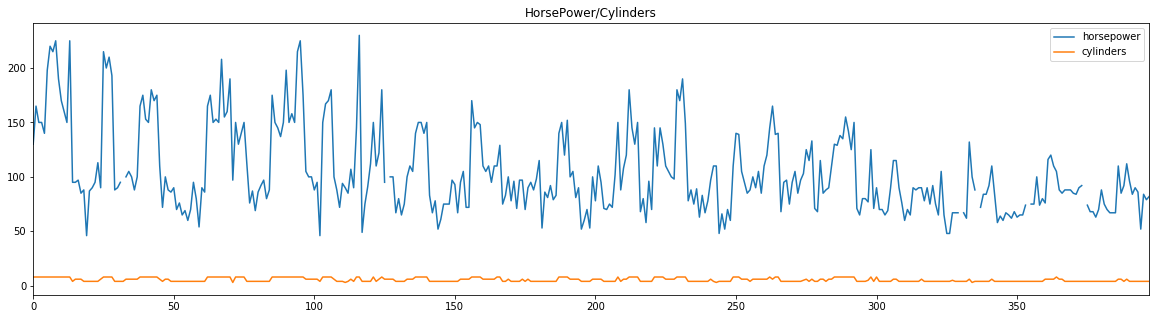

In [9]:
df[['horsepower', 'cylinders']].plot(title = 'HorsePower/Cylinders', figsize = (20, 5))

In [10]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [11]:
df[['horsepower', 'cylinders']].groupby(['cylinders']).mean()

,horsepower
cylinders,
3,99.250000
4,78.281407
5,82.333333
6,101.506024
8,158.300971


In [12]:
nan_index = df[df['horsepower'].isnull()].index

In [13]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [14]:
df['horsepower']=df[['horsepower', 'cylinders']].groupby(['cylinders']).transform(lambda x: x.fillna(x.mean()))

In [15]:
df.iloc[nan_index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,78.281407,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,101.506024,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,78.281407,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,78.281407,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,78.281407,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,78.281407,3035,20.5,82,1,amc concord dl


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
year            398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [17]:
df.drop('name', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
year            398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [19]:
origin = pd.get_dummies(df['origin'], prefix='origin')
df[origin.columns] = origin
df.drop('origin', axis = 1, inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


## make the dataset ready for ML
### 1 - define feature set and target set

In [32]:
X = df.drop('mpg', axis = 1)
y = df['mpg']

### 2 - Split into train and test - impute - scale

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
X_test_org

,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
65,8,351.0,153.0,4129,13.0,72,1,0,0
132,4,140.0,75.0,2542,17.0,74,1,0,0
74,8,302.0,140.0,4294,16.0,72,1,0,0
78,4,120.0,87.0,2979,19.5,72,0,1,0
37,6,232.0,100.0,3288,15.5,71,1,0,0
...,...,...,...,...,...,...,...,...,...
269,4,105.0,75.0,2230,14.5,78,1,0,0
235,4,97.0,75.0,2265,18.2,77,0,0,1
145,4,83.0,61.0,2003,19.0,74,0,0,1
196,4,98.0,60.0,2164,22.1,76,1,0,0


In [39]:
#scale 
#1 - instantiate the scaler
#2 - fit scaler
#3- transform
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [41]:
X_train_df = pd.DataFrame(X_train, columns= X.columns)
X_train_df

,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
0,1.0,0.645995,0.565217,0.712117,0.327381,0.166667,1.0,0.0,0.0
1,0.2,0.074935,0.076087,0.052993,0.654762,0.083333,0.0,1.0,0.0
2,0.2,0.074935,0.173913,0.154397,0.464286,0.833333,0.0,1.0,0.0
3,0.2,0.074935,0.000000,0.086222,0.773810,0.250000,0.0,1.0,0.0
4,0.2,0.134367,0.152174,0.282441,0.613095,0.916667,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
313,0.2,0.227390,0.320652,0.329705,0.380952,0.833333,1.0,0.0,0.0
314,0.6,0.470284,0.320652,0.488112,0.386905,0.500000,1.0,0.0,0.0
315,0.2,0.000000,0.016304,0.062446,0.684524,0.250000,0.0,1.0,0.0
316,0.6,0.470284,0.293478,0.467774,0.416667,0.083333,1.0,0.0,0.0


In [45]:
X_test_df = pd.DataFrame(X_test, columns= X.columns)
X_test_df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
0,1.0,0.731266,0.581522,0.710398,0.297619,0.166667,1.0,0.0,0.0
1,0.2,0.186047,0.157609,0.255801,0.535714,0.333333,1.0,0.0,0.0
2,1.0,0.604651,0.510870,0.757663,0.476190,0.166667,1.0,0.0,0.0
3,0.2,0.134367,0.222826,0.380980,0.684524,0.166667,0.0,1.0,0.0
4,0.6,0.423773,0.293478,0.469493,0.446429,0.083333,1.0,0.0,0.0


In [49]:
X_test_df['horsepower'].mean()

0.33228813906488963

In [50]:
X_train_df.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,0.490566,0.319897,0.311827,0.376509,0.455039,0.512317,0.613208,0.182390,0.204403
std,0.341234,0.265621,0.203982,0.242116,0.160787,0.304340,0.487783,0.386774,0.403900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.087209,0.157609,0.162489,0.357143,0.250000,0.000000,0.000000,0.000000
50%,0.200000,0.208010,0.250000,0.336150,0.446429,0.500000,1.000000,0.000000,0.000000
75%,1.000000,0.501292,0.429348,0.547766,0.544643,0.750000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

## ML
1. import the model
2. instantiate the model
3. fit the model
4. evaluate the model
5. fine-tune

In [52]:
# 1 - import the model
from sklearn.linear_model import LinearRegression
# 2 - instantiate the model
lreg = LinearRegression()
# 3 - fit the model
lreg.fit(X_train, y_train)
# 4 - evaluate the model
print('Train score: ',lreg.score(X_train, y_train))
print('Test score:', lreg.score(X_test, y_test))

Train score:  0.8212081322493087
Test score: 0.8281589344330136


In [53]:
lreg.coef_

array([ -1.97098449,   9.74316157,  -3.800013  , -23.32246924,
         3.22645609,   9.18065272,  -1.93560735,   0.72518161,
         1.21042574])

In [54]:
lreg.intercept_

26.026681786319116